In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def get_curts_FYMILP(case):
    df_curts_FYMILP = pd.read_csv(f"A.The_full_year_MILP/{case}/4.OutWoInv/oT_Result_RESCurtailment_{case}.csv")
    # Only considering existing lines:
    #df_utils_existing = df_utils_FYMILP[df_utils_FYMILP["Circuit"] == "eac1"]
    
    return df_curts_FYMILP

def extract_FYMILP_one_generator(all_curts_FYMILP,unit): 
    filter_this_gen = (all_curts_FYMILP["Unit"] == unit)
    curts_this_gen_FYMILP = all_curts_FYMILP[filter_this_gen]

    ts_this_gen_FYMILP = curts_this_gen_FYMILP.MW.to_numpy()
    return ts_this_gen_FYMILP

def extract_CM_one_gen(case,cm,nbc,unit): 
    ts_CM_All_lines = pd.read_csv(f"Y.FYTS_from_ByStages/{case}/{cm}/Curtailment_nc{nbc}.csv",header = [0],index_col=0)
    ts_this_line_CM = ts_CM_All_lines.loc[:,unit].to_numpy()
    return ts_this_line_CM

In [29]:
## Extract fyts for multiple lines 

case = "RTS24_mod1"

## FYMILP
all_curts_FYMILP = get_curts_FYMILP(case)

unique_generators = [x for x in all_curts_FYMILP["Unit"].drop_duplicates().values.tolist()]
nb_gens = len(unique_generators)

correls_v,total_diffs_v,total_devs_v,nbcs_v,cms_v = [],[],[],[],[]


##CM 
cm = "R&D"
for cm in ["R&D","CHI","OPT_LB","HI","OPC"]:
    for nbc in [10,20,50,100,200]:


#         ts_all_gens_CM=np.zeros(8736*nb_gens)
#         ts_all_gens_FYMILP=np.zeros(8736*nb_gens)
        ts_all_gens_CM=np.zeros(8736)
        ts_all_gens_FYMILP=np.zeros(8736)

        for i,generator in enumerate(unique_generators): 
            ts_this_gen_FYMILP = extract_FYMILP_one_generator(all_curts_FYMILP,generator)
            ts_this_gen_CM = extract_CM_one_gen(case,cm,nbc,generator)
            i_start =0
            i_end = 8736
            ts_all_gens_FYMILP[i_start:i_end] +=ts_this_gen_FYMILP
            ts_all_gens_CM[i_start:i_end] += ts_this_gen_CM

        total_dev= np.sum(np.abs((ts_all_gens_CM-ts_all_gens_FYMILP)))
        total_dev= np.sum((ts_all_gens_CM-ts_all_gens_FYMILP))
        correlation = np.corrcoef(ts_all_gens_FYMILP,ts_all_gens_CM)[0,1]

        cms_v.append(cm)
        nbcs_v.append(nbc)
        
        total_flow = np.sum((np.abs((ts_all_gens_FYMILP))))

        correls_v.append(correlation)
        total_diffs_v.append(total_dev)
        total_devs_v.append(total_dev/total_flow)
        print(generator)

df = pd.DataFrame({"CM":cms_v,"nbc":nbcs_v,"Correlation": correls_v,"Total diff":total_diffs_v,"Total dev":total_devs_v})


101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1
101_PV_1


In [18]:
ts_all_gens_FYMILP

array([2341.67028868, 2572.07826371, 2661.75917161, ..., 1535.43438199,
       1804.26507306, 1957.7653572 ])

In [19]:
np.sum(ts_all_gens_CM)

5215665.260207553

In [13]:
generator, extract_FYMILP_one_generator(all_curts_FYMILP,generator)

('Wind_Bilbo',
 array([57.17699151, 51.88065811, 41.9219907 , ...,  0.        ,
         0.        ,  0.        ]))

In [14]:
extract_CM_one_gen(case,cm,nbc,generator)

array([229.4492576, 229.4492576, 229.4492576, ...,   0.       ,
         0.       ,   0.       ])

In [ ]:
x = "nbc"
y= "Correlation"
sns.lineplot(data = df,x = x, y = y,hue = "CM",marker = "o")

<Axes: xlabel='nbc', ylabel='Total dev'>

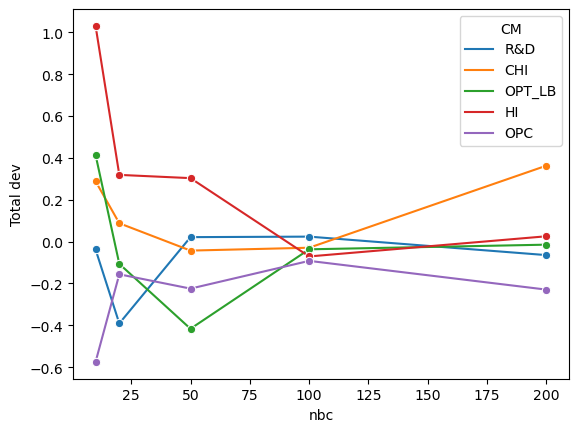

In [30]:
x = "nbc"
y= "Total dev"
sns.lineplot(data = df,x = x, y = y,hue = "CM",marker = "o")